# Advocate Information Visualisation

Visualising different advocate-related information to understand relationship between advocates and cases

In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np
from math import log10

Getting number of cases for each advocate to plot histogram

In [5]:
case_adv_path = "/home/workboots/Datasets/DHC/common_new/adv_info/adv_cases_num.json"
with open(case_adv_path, 'r') as f:
    case_adv_num = json.load(f)

Plotting histogram of number of advocates over different case bins to understand dataset imbalance

## Histogram for Total Dataset

In [7]:
bins = 10 # Can also be a list of bin edge values
hist, bin_edges = np.histogram(list(case_adv_num.values()))

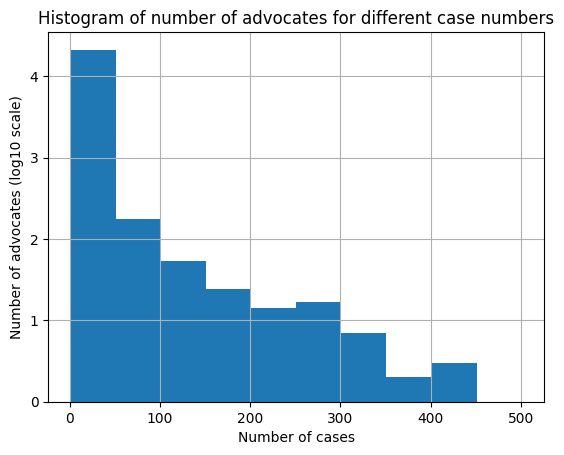

In [40]:
_ = plt.stairs(np.log10(hist), bin_edges, fill=True)
plt.title("Histogram of number of advocates for different case numbers")
plt.xlabel("Number of cases")
plt.ylabel("Number of advocates (log10 scale)")
plt.grid(True)
plt.savefig("/home/workboots/Vaults/assets/adv_rec_adv_distbn.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
hist

array([21231,   178,    54,    24,    14,    17,     7,     2,     3,
           1])

In [17]:
bin_edges

array([  1.,  51., 101., 151., 201., 251., 301., 351., 401., 451., 501.])

The histogram shows that 21231 of the 21531 advocates (98%) in the dataset contain less than *50 cases*.

Looking at the largest bin closer

## Histogram for bin with most advocates

In [25]:
atmost_fifty = {k: v for k, v in case_adv_num.items() if v <= 50}

In [27]:
hist_atmost_fifty, bin_edges_atmost_fifty = np.histogram(list(atmost_fifty.values()), bins=10)

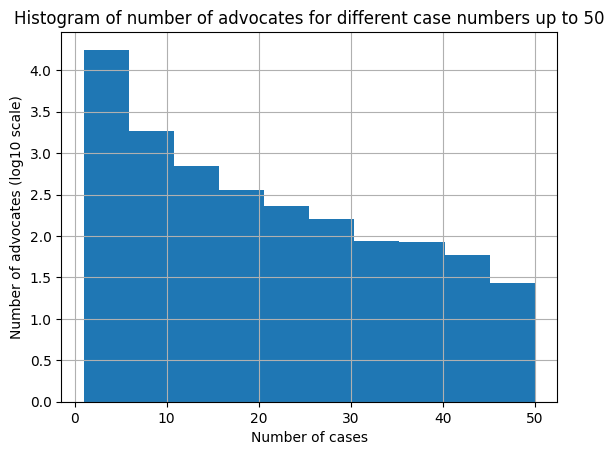

In [41]:
_ = plt.stairs(np.log10(hist_atmost_fifty), bin_edges_atmost_fifty, fill=True)
plt.title("Histogram of number of advocates for different case numbers up to 50")
plt.xlabel("Number of cases")
plt.ylabel("Number of advocates (log10 scale)")
plt.grid(True)
plt.savefig("/home/workboots/Vaults/assets/adv_rec_adv_less_than_fifty_distbn.png")
plt.show()

In [29]:
hist_atmost_fifty

array([17678,  1848,   694,   359,   232,   162,    88,    84,    59,
          27])

In [30]:
bin_edges_atmost_fifty

array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ])

17678 advocates of 21531 (82.1%) have **5 cases or less**. Such advocates can possibly not be considered for reliable recommendation. (Few-Shot Prediction might be an explorable strategy)

In [32]:
len(list(filter(lambda x: x == 1, case_adv_num.values())))

10979

10979 advocates (50%) have only one representative case.